Run the following 2 cells to export this document as PDF, without input cells. Currently, the "Save as" option from the menu bar doesn't work as well.

In [29]:
%%javascript
IPython.notebook.kernel.execute('strNotebookName = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [31]:
#Export current notebook as PDF without tagged cells
#only show error messages in stderr
strNotebookName2 = '"' + strNotebookName + '"' #filenames with spaces need to be wrapped in double quotes
!jupyter nbconvert $strNotebookName2 \
--TagRemovePreprocessor.remove_cell_tags="['remove_cell']" \
--to pdf \
--log-level ERROR \
--no-input
#--TemplateExporter.exclude_input=True

# Run from here down

In [1]:
import math
from sympy import *
from sympy import symbols
from IPython.display import display, Math, Latex, Markdown

# Factor of Safety

## Definition

Factor of Safety is defined in equation \eqref{lab_FS}:

In [2]:
FS, C_fail, C_worst = symbols('FS C_fail C_worst') #define symbolic variables
eq_FS = Eq(FS, C_fail/C_worst) #symbolic equality
Latex(r"""\begin{align}
%s &= %s
\label{lab_FS}\\
\nonumber
\newline  
\text{where}&, \nonumber \\
FS &= \text{Factor of Safety}, \nonumber \\
C_{fail} &= \text{defined failure condition (yield, buckling, critical deflection...)}, \nonumber \\
C_{worst} &= \text{"worst case" condition (stress, force, deflection...) under harshest service}. \nonumber
\end{align}""" % (latex(FS),latex(eq_FS.rhs)) )

<IPython.core.display.Latex object>

> The "defined failure condition" in equation \eqref{lab_FS} is a value such as a yield stress or buckling force or critical deflection or temperature, etc., that constitutes failure of the structure. The "worst case condition" is an estimate of the actual stress level (or force or temperature or deflection, etc.) that occurs in the component when the estimated harshest loading, which the structure will ever be subjected to in service, is applied. An FS value substantially greater than "1.0" provides for adequate separation between the failure condition and worst case condition and is necessary because the estimates of these conditions have some degree of uncertainty.
>
> A Factor of Safety should be computed whenever the limiting condition is a failure
condition (such as a yield or ultimate strength, buckling or collapse load, etc.). Minimum
acceptable values for Factor of Safety are defined elsewhere.
>
> &mdash; <cite>MODEL STRESS REPORT REQUIREMENTS – ADDENDUM, Tunnel_9_Model_Stress_Analysis_Reporting_addendum_Rev4.pdf, Date:4/28/2008</cite>
>

## Inputs

In [3]:
v_C_fail = 36000 #psi, yield stress
m_C_fail=latex(r"$C_{fail} = %1.0f \ \text{psi}$" %v_C_fail) #formatting for display

{{m_C_fail}}

In [4]:
v_C_worst = 12500 #psi, worst case stress
m_C_worst=latex(r"$C_{worst} = %1.0f \ \text{psi}$" %v_C_worst) #formatting for display

{{m_C_worst}}

## Calculation

In [5]:
#substitute values and solve for S
with evaluate(False): #prevent simplification
    subs_FS = eq_FS.subs([(C_fail, v_C_fail), (C_worst, v_C_worst)])
    
set_FS = solveset(subs_FS,FS) #returns a set object
for v_FS in set_FS: #get first item from the set
    break
    
m_FS=latex("$FS = %1.1f$" %(math.floor(v_FS*10)/10.0)) #don't round factor of safety up

In [6]:
Latex(r"""\begin{align}
%s &= %s \\
&= %s \\
&= %s
\label{lab2_FS}\\
\nonumber
\end{align}""" % (latex(FS),latex(eq_FS.rhs),latex(subs_FS.rhs),latex(float(v_FS) ) ) )

<IPython.core.display.Latex object>

## Results

Therefore, on XXXXXXXXX: {{m_FS}}.

# Margin of Safety

## Definition

Margin of Safety is defined in equation \eqref{lab_MS}:

In [7]:
MS, C_allow, C_worst = symbols('MS C_allow C_worst') #define symbolic variables
eq_MS = Eq(MS, (C_allow/C_worst)-1) #symbolic equality
Latex(r"""\begin{align}
%s &= %s
\label{lab_MS}\\
\nonumber
\newline  
\text{where}&, \nonumber \\
MS &= \text{Margin of Safety}, \nonumber \\
C_{allow} &= \text{defined allowable condition (design allowable stress, working load rating...)}, \nonumber \\
C_{worst} &= \text{"worst case" condition (stress, force, deflection...under harshest service)}. \nonumber
\end{align}""" % (latex(MS),latex(eq_MS.rhs)) )

<IPython.core.display.Latex object>

>The "allowable" condition does NOT constitute a failure condition, but rather is a maximum safe condition. The "allowable" includes an implicit factor of safety which provides the necessary separation from the failure condition. A positive (or zero) MS value indicates that a stress, or force or temperature or deflection, etc., does not exceed the allowable condition. A negative MS indicates the stress, or force or temperature, etc., exceeds the allowable condition. By its definition an Margin of Safety is acceptable if it is positive (or zero) and unacceptable if it is negative. Margins of Safety will typically be applied to commercial parts that have a manufacturer's maximum safe load rating.
>
>A Margin of Safety should be computed whenever the limiting condition is an allowable
condition (such as a design allowable stress specified in a welding or pressure vessel code, or a
working load rating of a commercial component).
>
> &mdash; <cite>MODEL STRESS REPORT REQUIREMENTS – ADDENDUM, Tunnel_9_Model_Stress_Analysis_Reporting_addendum_Rev4.pdf, Date:4/28/2008</cite>

## Inputs

In [8]:
v_C_allow = 36000 #psi, yield stress
m_C_allow=latex(r"$C_{allow} = %1.0f \ \text{psi}$" %v_C_allow) #formatting for display

{{m_C_allow}}

In [9]:
v_C_worst = 12500 #psi, worst case stress
m_C_worst=latex(r"$C_{worst} = %1.0f \ \text{psi}$" %v_C_worst) #formatting for display

{{m_C_worst}}

## Calculation

In [10]:
#substitute values and solve for S
with evaluate(False): #prevent simplification
    subs_MS = eq_MS.subs([(C_allow, v_C_allow), (C_worst, v_C_worst)])
    
set_MS = solveset(subs_MS,MS) #returns a set object
for v_MS in set_MS: #get first item from the set
    break
    
m_MS=latex("$MS = %1.1f$" %(math.floor(v_MS*10)/10.0)) #don't round up

In [11]:
Latex(r"""\begin{align}
%s &= %s \\
&= %s \\
&= %s
\label{lab2_MS}\\
\nonumber
\end{align}""" % (latex(MS),latex(eq_MS.rhs),latex(subs_MS.rhs),latex(float(v_MS) ) ) )

<IPython.core.display.Latex object>

## Results

Therefore, on XXXXXXXXX: {{m_MS}}.

# Temp

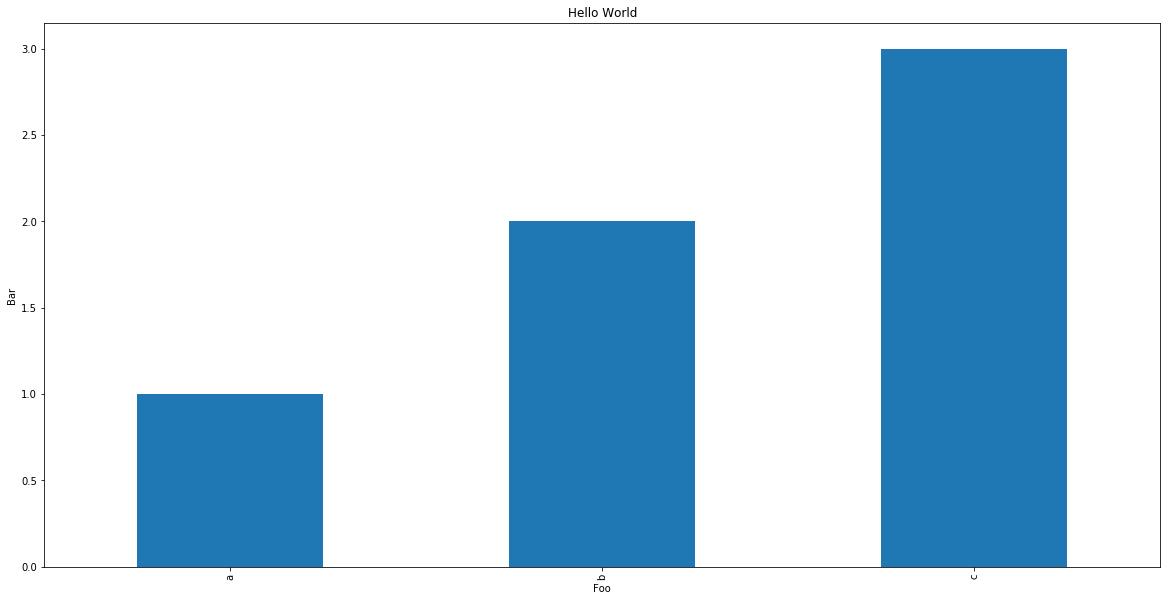

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

s = pd.Series([1,2,3], index=['a','b','c'])

s.plot.bar(figsize=(20,10))
plt.xlabel('Foo')
plt.ylabel('Bar')
plt.title("Hello World");

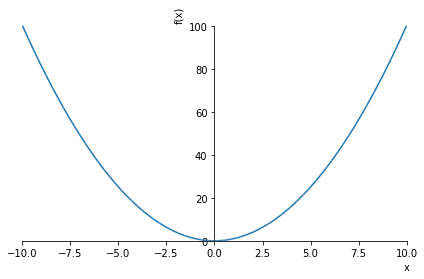

In [13]:
from sympy.plotting import plot
x = symbols('x')
p1 = plot(x**2, show=False)
#p2 = plot(x, show = False)
#p1.append(p2[0])
p1.show()

Max. Allowable Design Stress = syield/2 or sult./3 whichever is lower
(Von Mises or Tresca)

# Citations

## APA style

[1] Oberg, E., Jones, F. D., Horton, H. L., and Ryffel, H. H. (1996). Machinery's handbook: A reference book for the mechanical engineer, designer, manufacturing engineer, draftsman, toolmaker and machinist (25th edition.). New York: Industrial Press.

[2] Shigley, J. and Mitchell, L. (1993). Mechanical engineering design. New York: McGraw-Hill.

[3]
<cite id="3">
Roark, R. J. 1., Young, W. C., and Budynas, R. G. (2002). Roark's formulas for stress and strain (Seventh edition.). New York: McGraw-Hill.
</cite>

## ASME style

Per ASME Citation Guide: https://www.asme.org/publications-submissions/proceedings/author-guidelines/elements-of-a-paper/references

[4]
<cite id="Oberg1996">
Oberg, Erik, Jones, Franklin D., Horton, Holbrook L., and Ryffel, Henry H.. “Strength of Materials.” Machinery's Handbook: A Reference Book for the Mechanical Engineer, Designer, Manufacturing Engineer, Draftsman, Toolmaker and Machinist (25th Edition). Industrial Press, New York (1996): pp. 197.
</cite>

http://www.holo-krome.com/pdf/Consolidated_Tech_Manual.pdf, TABLE 25 HOLO-KROME MECHANICAL PROPERTIES SOCKET HEAD CAP SCREWS – 1960 SERIES

(MIL-HDBK-5J, 31 January 2003, page 2-169)

Handbook of Equations for Mass and Area Properties of Various Geometrical Shapes, U.S. Naval Ordnance Test Station, 1962
http://www.dtic.mil/dtic/tr/fulltext/u2/274936.pdf
